In [5]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [7]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS
import nltk
from konlpy.tag import Twitter
t = Twitter()

In [9]:
# 네이버 웹툰 리뷰가 저장된 파일을 읽는다.
review = open('./review.txt', encoding='utf-8').read()

In [11]:
# 한글 형태소 분석을 실행한다.
review_tokens = t.nouns(review)
review_tokens

['단행본',
 '꼭',
 '진짜',
 '못',
 '가지',
 '할복',
 '고딩',
 '술',
 '멕이면',
 '계급',
 '어쩌구이러',
 '자식',
 '술',
 '집착',
 '이유',
 '집안',
 '꼬락서니',
 '인생살이',
 '왜',
 '원인',
 '파악',
 '자기',
 '객관',
 '커녕',
 '술처',
 '남탓',
 '은영',
 '이의',
 '저',
 '웃음',
 '아버지',
 '무슨',
 '흉기',
 '협박',
 '경고',
 '문구',
 '자마자',
 '철렁',
 '드',
 '은영',
 '언제',
 '은영',
 '과거',
 '완결',
 '각',
 '흐엉',
 '애',
 '정',
 '연재',
 '난',
 '예상',
 '이번',
 '편',
 '회차',
 '제일',
 '미영',
 '언니',
 '하루',
 '종일',
 '아이',
 '컨텍',
 '편이',
 '집',
 '구석',
 '귀신',
 '애가',
 '진짜',
 '은영',
 '엄마',
 '아빠',
 '은영',
 '아빠',
 '엄마',
 '쩜',
 '우리',
 '집',
 '우리엄마',
 '아빠',
 '나',
 '말',
 '때',
 '항상',
 '끝',
 '나쁜사람',
 '로',
 '그냥',
 '사람',
 '입체',
 '나',
 '상처',
 '준',
 '적도',
 '사람',
 '그냥',
 '세상',
 '난',
 '작가',
 '진짜',
 '눈',
 '표현',
 '작화',
 '볼때',
 '이',
 '학대',
 '약간',
 '혼란',
 '댓글',
 '페이지',
 '개수',
 '은영',
 '발',
 '우리',
 '뭘',
 '말',
 '제',
 '전',
 '아빠',
 '말',
 '소름',
 '계급',
 '떼',
 '주병',
 '대가리',
 '깨',
 '은영',
 '계급',
 '이제',
 '거',
 '니',
 '아빠',
 '그림자',
 '작가',
 '얘',
 '숨',
 '턱턱',
 '씨',
 '지네',
 '저런',
 '사람',
 '둘',
 '저런',
 '부모',
 '또',
 '명줄',
 '죽지',
 '백은영',

In [12]:
# 불용어를 정의한다.
stop_words = ['페이지', '댓글']
review_tokens = [each_word for each_word in review_tokens if each_word not in stop_words and len(each_word) > 1]
review_tokens

['단행본',
 '진짜',
 '가지',
 '할복',
 '고딩',
 '멕이면',
 '계급',
 '어쩌구이러',
 '자식',
 '집착',
 '이유',
 '집안',
 '꼬락서니',
 '인생살이',
 '원인',
 '파악',
 '자기',
 '객관',
 '커녕',
 '술처',
 '남탓',
 '은영',
 '이의',
 '웃음',
 '아버지',
 '무슨',
 '흉기',
 '협박',
 '경고',
 '문구',
 '자마자',
 '철렁',
 '은영',
 '언제',
 '은영',
 '과거',
 '완결',
 '흐엉',
 '연재',
 '예상',
 '이번',
 '회차',
 '제일',
 '미영',
 '언니',
 '하루',
 '종일',
 '아이',
 '컨텍',
 '편이',
 '구석',
 '귀신',
 '애가',
 '진짜',
 '은영',
 '엄마',
 '아빠',
 '은영',
 '아빠',
 '엄마',
 '우리',
 '우리엄마',
 '아빠',
 '항상',
 '나쁜사람',
 '그냥',
 '사람',
 '입체',
 '상처',
 '적도',
 '사람',
 '그냥',
 '세상',
 '작가',
 '진짜',
 '표현',
 '작화',
 '볼때',
 '학대',
 '약간',
 '혼란',
 '개수',
 '은영',
 '우리',
 '아빠',
 '소름',
 '계급',
 '주병',
 '대가리',
 '은영',
 '계급',
 '이제',
 '아빠',
 '그림자',
 '작가',
 '턱턱',
 '지네',
 '저런',
 '사람',
 '저런',
 '부모',
 '명줄',
 '죽지',
 '백은영',
 '행복',
 '회로',
 '귀신',
 '무서움',
 '아빠',
 '처음',
 '번은',
 '쫄리',
 '소리',
 '폭력',
 '한번',
 '태도',
 '애기',
 '도대체',
 '어쩌',
 '보기',
 '도대체',
 '진짜',
 '어쩌',
 '무시',
 '마치',
 '모든',
 '때문',
 '행동',
 '때문',
 '계속',
 '정말',
 '하자',
 '말로',
 '말꼬투리',
 '온갖',
 '짜증',
 '부리',
 '진짜',
 '어쩌',
 '아빠

In [20]:
# 워드클라우드로 구현할 단어들의 출현 빈도수를 센다.
token = nltk.Text(review_tokens)
token.vocab().most_common(100)

[('은영', 370),
 ('진짜', 201),
 ('마리', 132),
 ('부모', 99),
 ('사람', 89),
 ('엄마', 84),
 ('아빠', 84),
 ('계급', 81),
 ('자식', 71),
 ('백은영', 68),
 ('걱정', 65),
 ('자기', 63),
 ('가족', 57),
 ('생각', 56),
 ('우리', 47),
 ('폭력', 46),
 ('마음', 45),
 ('애비', 45),
 ('그냥', 39),
 ('상처', 38),
 ('하나', 38),
 ('다른', 36),
 ('보고', 34),
 ('오빠', 34),
 ('이제', 31),
 ('가정', 31),
 ('대화', 30),
 ('저런', 29),
 ('가정폭력', 29),
 ('작가', 28),
 ('표정', 28),
 ('애가', 26),
 ('제발', 26),
 ('남자', 25),
 ('무슨', 23),
 ('정말', 23),
 ('가스', 23),
 ('얘기', 23),
 ('현실', 23),
 ('아버지', 21),
 ('계속', 21),
 ('와중', 21),
 ('아이', 20),
 ('잘못', 20),
 ('노력', 20),
 ('눈물', 19),
 ('지금', 19),
 ('소리', 18),
 ('부모님', 18),
 ('때문', 17),
 ('행동', 17),
 ('아들', 17),
 ('본인', 17),
 ('인간', 17),
 ('집안', 16),
 ('가정사', 16),
 ('문제', 16),
 ('얼굴', 16),
 ('얼마나', 15),
 ('이번', 14),
 ('이야기', 14),
 ('흉터', 14),
 ('제대로', 14),
 ('바로', 14),
 ('제일', 13),
 ('소름', 13),
 ('턱턱', 13),
 ('심장', 13),
 ('묘사', 13),
 ('진심', 13),
 ('관계', 12),
 ('뭔가', 12),
 ('이면', 12),
 ('어머니', 12),
 ('정상', 12),
 ('자신', 12),

In [19]:
# 워드클라우드로 구현할 단어를 추출해 단어를 key로 하고 출현 빈도수를 value로 하는 딕셔너리를 만든다.
data = dict(token.vocab().most_common(100))
data

{'은영': 370,
 '진짜': 201,
 '마리': 132,
 '부모': 99,
 '사람': 89,
 '엄마': 84,
 '아빠': 84,
 '계급': 81,
 '자식': 71,
 '백은영': 68,
 '걱정': 65,
 '자기': 63,
 '가족': 57,
 '생각': 56,
 '우리': 47,
 '폭력': 46,
 '마음': 45,
 '애비': 45,
 '그냥': 39,
 '상처': 38,
 '하나': 38,
 '다른': 36,
 '보고': 34,
 '오빠': 34,
 '이제': 31,
 '가정': 31,
 '대화': 30,
 '저런': 29,
 '가정폭력': 29,
 '작가': 28,
 '표정': 28,
 '애가': 26,
 '제발': 26,
 '남자': 25,
 '무슨': 23,
 '정말': 23,
 '가스': 23,
 '얘기': 23,
 '현실': 23,
 '아버지': 21,
 '계속': 21,
 '와중': 21,
 '아이': 20,
 '잘못': 20,
 '노력': 20,
 '눈물': 19,
 '지금': 19,
 '소리': 18,
 '부모님': 18,
 '때문': 17,
 '행동': 17,
 '아들': 17,
 '본인': 17,
 '인간': 17,
 '집안': 16,
 '가정사': 16,
 '문제': 16,
 '얼굴': 16,
 '얼마나': 15,
 '이번': 14,
 '이야기': 14,
 '흉터': 14,
 '제대로': 14,
 '바로': 14,
 '제일': 13,
 '소름': 13,
 '턱턱': 13,
 '심장': 13,
 '묘사': 13,
 '진심': 13,
 '관계': 12,
 '뭔가': 12,
 '이면': 12,
 '어머니': 12,
 '정상': 12,
 '자신': 12,
 '먼저': 12,
 '순간': 12,
 '환경': 12,
 '친구': 12,
 '고딩': 11,
 '이유': 11,
 '항상': 11,
 '미성년': 11,
 '해도': 11,
 '다시': 11,
 '웹툰': 11,
 '장면': 11,
 '주완': 11,
 '사랑': 

In [17]:
# 워드클라우드 마스크 이미지
mask = np.array(Image.open('./mask.png'))

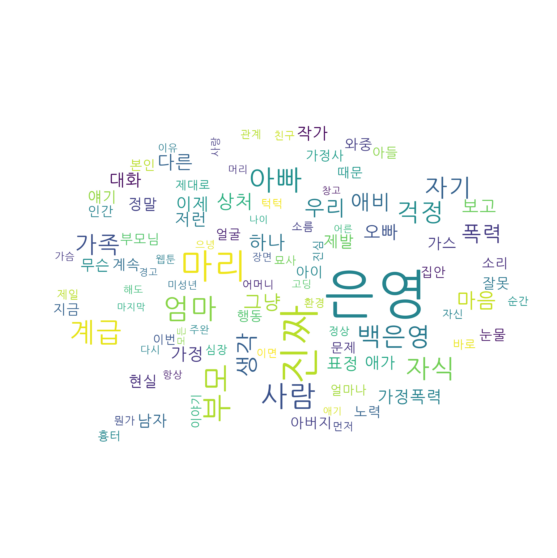

In [23]:
# 딕셔너리에 저장된 데이터는 generate_from_frequencies() 함수를 사용해서 워드클라우드를 만든다.
wordcloud = WordCloud(
    font_path='C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    max_font_size=200,
    max_words=100,
    mask=mask
).generate_from_frequencies(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()